In [27]:
import pandas as pd
import geopandas as gpd

iod = pd.read_csv(r'D:\File_7_-_All_IoD2019_Scores__Ranks__Deciles_and_Population_Denominators.csv', thousands=',')
#get rid of all the spaces in the column names
iod.columns = [c.replace(' ', '_') for c in iod.columns]
#remove all the brackets
iod.columns = [c.replace('(', '') for c in iod.columns]
iod.columns = [c.replace(')', '') for c in iod.columns]
iod.info()
iod.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 57 columns):
LSOA_code_2011                                                                                      32844 non-null object
LSOA_name_2011                                                                                      32844 non-null object
Local_Authority_District_code_2019                                                                  32844 non-null object
Local_Authority_District_name_2019                                                                  32844 non-null object
Index_of_Multiple_Deprivation_IMD_Score                                                             32844 non-null float64
Index_of_Multiple_Deprivation_IMD_Rank_where_1_is_most_deprived                                     32844 non-null int64
Index_of_Multiple_Deprivation_IMD_Decile_where_1_is_most_deprived_10%_of_LSOAs                      32844 non-null int64
Income_Score_rate                     

,LSOA_code_2011,LSOA_name_2011,Local_Authority_District_code_2019,Local_Authority_District_name_2019,Index_of_Multiple_Deprivation_IMD_Score,Index_of_Multiple_Deprivation_IMD_Rank_where_1_is_most_deprived,Index_of_Multiple_Deprivation_IMD_Decile_where_1_is_most_deprived_10%_of_LSOAs,Income_Score_rate,Income_Rank_where_1_is_most_deprived,Income_Decile_where_1_is_most_deprived_10%_of_LSOAs,...,Indoors_Sub-domain_Rank_where_1_is_most_deprived,Indoors_Sub-domain_Decile_where_1_is_most_deprived_10%_of_LSOAs,Outdoors_Sub-domain_Score,Outdoors_Sub-domain_Rank_where_1_is_most_deprived,Outdoors_Sub-domain_Decile_where_1_is_most_deprived_10%_of_LSOAs,Total_population:_mid_2015_excluding_prisoners,Dependent_Children_aged_0-15:_mid_2015_excluding_prisoners,Population_aged_16-59:_mid_2015_excluding_prisoners,Older_population_aged_60_and_over:_mid_2015_excluding_prisoners,Working_age_population_18-59/64:_for_use_with_Employment_Deprivation_Domain_excluding_prisoners_
12,E01000014,Barking and Dagenham 013B,E09000002,Barking and Dagenham,35.670,5650,2,0.201,6627,3,...,17101,6,1.004,4096,2,1669,401,1044,224,1022
32642,E01033567,Birmingham 135B,E08000025,Birmingham,24.672,10965,4,0.016,32509,10,...,7059,3,1.672,1087,1,1621,90,1497,34,1517
3252,E01003326,Lewisham 035A,E09000023,Lewisham,28.866,8566,3,0.200,6658,3,...,5615,2,1.320,2344,1,1581,326,948,307,971
13027,E01013432,York 007C,E06000014,York,4.811,30696,10,0.026,31459,10,...,21581,7,-0.269,19787,7,2109,436,1187,486,1173
27186,E01027901,Selby 003D,E07000169,Selby,2.589,32449,10,0.036,29647,10,...,23768,8,-1.045,29812,10,1693,300,888,505,907
1642,E01001677,Greenwich 006E,E09000011,Greenwich,19.733,14595,5,0.139,11528,4,...,9203,3,0.690,6577,3,2258,532,1492,234,1457
19953,E01020512,West Dorset 012A,E06000059,Dorset,20.882,13647,5,0.069,21792,7,...,330,1,-0.547,24155,8,2120,298,974,848,1022
3165,E01003235,Lewisham 038A,E09000023,Lewisham,28.429,8806,3,0.186,7612,3,...,14000,5,0.946,4532,2,1327,275,834,218,824
25625,E01026307,South Kesteven 014E,E07000141,South Kesteven,4.377,31129,10,0.037,29326,9,...,30954,10,-0.641,25437,8,1258,196,645,417,674
14675,E01015131,Plymouth 030C,E06000026,Plymouth,4.320,31190,10,0.030,30748,10,...,31324,10,-0.145,17748,6,1524,199,628,697,638


In [28]:
craven = iod.loc[iod['Local_Authority_District_code_2019']=='E07000163']
craven = craven[['LSOA_code_2011','Crime_Rank_where_1_is_most_deprived']]
#craven[["Crime_Rank_where_1_is_most_deprived"]].apply(pd.to_numeric)
craven.info()
craven.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 26843 to 26874
Data columns (total 2 columns):
LSOA_code_2011                         32 non-null object
Crime_Rank_where_1_is_most_deprived    32 non-null int64
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


,LSOA_code_2011,Crime_Rank_where_1_is_most_deprived
26843,E01027555,31468
26844,E01027556,29419
26845,E01027557,31475
26846,E01027558,26128
26847,E01027559,30583
26848,E01027560,29427
26849,E01027561,31262
26850,E01027562,28422
26851,E01027563,30439
26852,E01027564,25713


In [29]:
from osgeo import gdal, ogr, osr
from fiona.ogrext import Iterator, ItemsIterator, KeysIterator
from geopandas import GeoDataFrame
gdal.VersionInfo()

'2030300'

In [30]:
import matplotlib.pyplot as plt
#this should read the geojson as per this tutorial https://medium.com/@h4k1m0u/plot-a-geojson-map-using-geopandas-be89e7a0b93b
#this is for the local authority area.
gdf = gpd.read_file('https://opendata.arcgis.com/datasets/bbb0e58b0be64cc1a1460aa69e33678f_0.geojson')
gdf.head()

,objectid,lad19cd,lad19nm,lad19nmw,bng_e,bng_n,long,lat,st_areashape,st_lengthshape,geometry
0,1,E06000001,Hartlepool,,447157,531476,-1.27023,54.676201,9.651231e+07,50488.387081,"POLYGON ((-1.17763 54.69919, -1.24284 54.72226..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.544701,5.522915e+07,35506.404054,"POLYGON ((-1.28263 54.56528, -1.27061 54.55602..."
2,3,E06000003,Redcar and Cleveland,,464359,519597,-1.00611,54.567501,2.484090e+08,79150.715938,"POLYGON ((-1.14913 54.61433, -1.16025 54.60454..."
3,4,E06000004,Stockton-on-Tees,,444937,518183,-1.30669,54.556900,2.052315e+08,87566.678920,"POLYGON ((-1.28263 54.56528, -1.26256 54.57029..."
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.535301,1.988128e+08,91926.839545,"POLYGON ((-1.69693 54.53601, -1.65794 54.53459..."


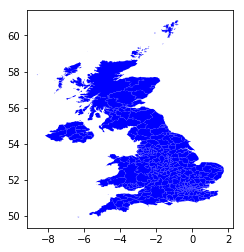

In [31]:
#this should plot the shape data from the geodataframe
testplot = gdf.plot(color='blue')

In [32]:
#this is for the LSOA 
lsoa_gdf = gpd.read_file('https://opendata.arcgis.com/datasets/da831f80764346889837c72508f046fa_3.geojson')
lsoa_gdf.head()

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry
0,1,E01013150,North East Lincolnshire 013B,North East Lincolnshire 013B,2.842166e+05,2286.649368,"POLYGON ((-0.13613 53.55644, -0.13298 53.56005..."
1,2,E01015580,Swindon 007D,Swindon 007D,4.534211e+05,3426.828755,"POLYGON ((-1.78573 51.57653, -1.78735 51.58018..."
2,3,E01023601,North Hertfordshire 010A,North Hertfordshire 010A,2.801437e+05,2228.370570,"POLYGON ((-0.27428 51.94900, -0.26525 51.95320..."
3,4,E01024217,Dover 005B,Dover 005B,7.351294e+06,13012.376562,"POLYGON ((1.40258 51.23871, 1.39393 51.25655, ..."
4,5,E01000722,Bromley 023A,Bromley 023A,5.691620e+05,3524.308527,"POLYGON ((0.11461 51.39255, 0.11185 51.39465, ..."


In [38]:
#truncate it down using a contains wild card type argument
cravengdf = lsoa_gdf[['Craven' in x for x in lsoa_gdf['lsoa11nm']]]
cravengdf.info()
cravengdf.head(32)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 32 entries, 976 to 33754
Data columns (total 7 columns):
objectid          32 non-null int64
lsoa11cd          32 non-null object
lsoa11nm          32 non-null object
lsoa11nmw         32 non-null object
st_areashape      32 non-null float64
st_lengthshape    32 non-null float64
geometry          32 non-null geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 2.0+ KB


,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry
976,977,E01027555,Craven 008A,Craven 008A,1.297684e+07,19399.701436,"POLYGON ((-1.96505 53.94823, -1.98425 53.95043..."
984,985,E01027557,Craven 004A,Craven 004A,1.588047e+08,95399.166817,"POLYGON ((-1.86711 54.09769, -1.89100 54.10442..."
4057,4058,E01027571,Craven 003B,Craven 003B,1.020976e+08,66947.908666,"POLYGON ((-2.24937 54.14064, -2.24951 54.14069..."
4065,4066,E01027570,Craven 001D,Craven 001D,1.011953e+08,57998.779646,"POLYGON ((-2.28641 54.24050, -2.29276 54.25262..."
4870,4871,E01027567,Craven 002B,Craven 002B,4.836950e+07,39280.642558,"POLYGON ((-1.90309 54.11965, -1.90562 54.12247..."
4882,4883,E01027559,Craven 001B,Craven 001B,2.353149e+06,9687.004888,"POLYGON ((-2.52105 54.12269, -2.52451 54.11744..."
7355,7356,E01027579,Craven 005D,Craven 005D,4.407279e+05,2940.804852,"POLYGON ((-2.00275 53.95716, -2.00854 53.96018..."
7362,7363,E01027578,Craven 006A,Craven 006A,1.585193e+05,1879.022448,"POLYGON ((-2.01217 53.95950, -2.01782 53.95978..."
7727,7728,E01027586,Craven 007D,Craven 007D,4.781307e+07,36769.625697,"POLYGON ((-2.04944 53.95658, -2.06114 53.95923..."
8147,8148,E01027569,Craven 001C,Craven 001C,1.028364e+08,43977.455704,"POLYGON ((-2.37407 54.04909, -2.36507 54.06120..."


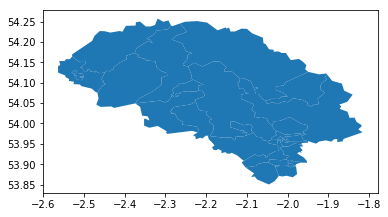

In [34]:
cravengdf.plot()

In [37]:
merged = cravengdf.merge(craven, left_on = 'lsoa11cd', right_on = 'LSOA_code_2011')
merged
merged.info()
merged.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 9 columns):
objectid                               32 non-null int64
lsoa11cd                               32 non-null object
lsoa11nm                               32 non-null object
lsoa11nmw                              32 non-null object
st_areashape                           32 non-null float64
st_lengthshape                         32 non-null float64
geometry                               32 non-null geometry
LSOA_code_2011                         32 non-null object
Crime_Rank_where_1_is_most_deprived    32 non-null int64
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 2.5+ KB


,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,LSOA_code_2011,Crime_Rank_where_1_is_most_deprived
0,977,E01027555,Craven 008A,Craven 008A,1.297684e+07,19399.701436,"POLYGON ((-1.96505 53.94823, -1.98425 53.95043...",E01027555,31468
1,985,E01027557,Craven 004A,Craven 004A,1.588047e+08,95399.166817,"POLYGON ((-1.86711 54.09769, -1.89100 54.10442...",E01027557,31475
2,4058,E01027571,Craven 003B,Craven 003B,1.020976e+08,66947.908666,"POLYGON ((-2.24937 54.14064, -2.24951 54.14069...",E01027571,32298
3,4066,E01027570,Craven 001D,Craven 001D,1.011953e+08,57998.779646,"POLYGON ((-2.28641 54.24050, -2.29276 54.25262...",E01027570,30314
4,4871,E01027567,Craven 002B,Craven 002B,4.836950e+07,39280.642558,"POLYGON ((-1.90309 54.11965, -1.90562 54.12247...",E01027567,32428


https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0
Might have a go with this tutorial first

import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline

#define the calculation colours for the heat map
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1))
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;
    
    


In [39]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 30000, high = 33000)
#Define custom tick labels for color bar.
tick_labels = {'30000': '30k', '33000': '>33k'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Crime Rank in the UK for districts in Craven ', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Crime_Rank_where_1_is_most_deprived', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

Loading BokehJS ...